# 深層学習: Deep Learning
ディープラーニングの例として、 全結合層のみで作った多層ニューラルネットワークを使い、</br>
手書きの数字（画像データ）から書かれた数字を予測するコードを作る

- <b>Epoch</b> : 学習データを試用した回数
- <b>ETA</b> : estimated time of arrival の略で、1エポックあたりのトレーニングにかかる時間の予測
- <b>loss</b> : 訓練データに対する損失
- <b>accuracy</b> : 訓練データに対する精度
- <b>val_loss</b> : 検証データに対する損失
- <b>val_accuracy</b> : 検証データに対する精度

Epoch 1/5
12/12 [==============================] - 0s 9ms/step - loss: 2.4125 - accuracy: 0.1482 - val_loss: 2.0707 - val_accuracy: 0.3790
Epoch 2/5
12/12 [==============================] - 0s 5ms/step - loss: 2.1058 - accuracy: 0.2533 - val_loss: 1.8585 - val_accuracy: 0.5940
Epoch 3/5
12/12 [==============================] - 0s 5ms/step - loss: 1.8798 - accuracy: 0.3733 - val_loss: 1.6781 - val_accuracy: 0.6560
Epoch 4/5
12/12 [==============================] - 0s 4ms/step - loss: 1.6996 - accuracy: 0.4608 - val_loss: 1.5166 - val_accuracy: 0.6730
Epoch 5/5
12/12 [==============================] - 0s 4ms/step - loss: 1.5320 - accuracy: 0.5337 - val_loss: 1.3672 - val_accuracy: 0.7270


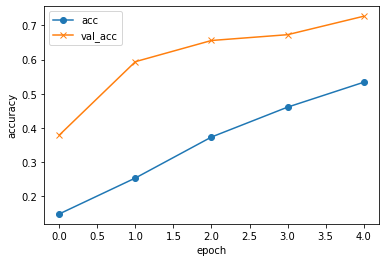

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = tf.keras.utils.to_categorical(y_train)[:6000]
y_test = tf.keras.utils.to_categorical(y_test)[:1000]

model = tf.keras.Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])

# epochs数は5を指定
history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history['accuracy'], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## ディープラーニング
### ニューロン
### ニューラルネットワーク
深層ニューラルネット/多層パーセプトロン
#### 畳み込みニューラルネット
#### 回帰結合ニューラルネット
### ディープラーニングが注目されている理由
1. アルゴリズムが発見されたこと
2. 膨大なデータが収集可能になったこと
3. GPUなど計算機の高性能化

## 深層学習とは1
深層学習はディープラーニングとも呼ばれ、機械学習の一種であり、さらに一歩進んだ技術</br>
データの分類や回帰を行うために、生物の神経ネットワークを参考に ディープニューラルネットワーク というモデルを使う</br>
深層学習の目的は脳の神経ネットワークの再現ではなく、画像や音声などの 認識精度を高める ことを目標として研究が行われている</br>
画像認識、映像解析を利用した自動運転技術や、音声解析で実現するスマートスピーカー「Google Home」や「Siri」など、</br>
実は私たちの日常生活の多くの場面でこの技術が使われている

例えば、画像の中から「車」を検出するプログラムを作成する場合、</br>
機械学習ではいろいろな種類の車のタイヤやフロントガラスの特徴などの細かい情報をあらかじめ用意して、それを学習させたモデルを作る必要があった</br>
しかし、深層学習はそのようなモデルなしに、車のパーツの特徴を 自動 で見つけられる

## [重要]ニューロンの計算方法と学習方法
https://premium.aidemy.jp/courses/5090/exercises/Cz4GZjnmsf</br>

### ニューロンの内部の処理
![](./images/nueral_network.png)


### 活性化関数の処理の例
- シグモイド関数
- ReLu関数
### ニューラルネットワークの計算
![](./images/neural_network_learn.png)

## 深層学習とは2
ニューラルネットワークを構成するニューロンを表したもので、x_1, x_2x  が入力値で、w_1, w_2w は 重みパラメータ</br>
入力が閾値を超えると、ニューロンは次のニューロンへの情報伝達を行い、ニューロンの発火と呼ぶ</br>
ニューラルネットワークではベクトルや行列などの入力値を受け取り、発火の連鎖を経て最終的にスカラーやベクトルなどの値を出力する</br>
これを画像認識で例えると、動物の画像のピクセルデータを入力することで、どのカテゴリ（ネコ、イヌ、トリなど）に属する確率が高いかという情報が出力されるイメージになる

![](./images/neuron.png)

下図のようにニューロンの層を積み重ね、より複雑な問題を扱えるようにしたのが ディープニューラルネットワーク</br>
特に4層以上の構造を指すことが多く、その構造の深さから「ディープ」という名前を付けられている</br>
深層学習では 各ニューロンの重みパラメータを機械的に調整する ことで分類モデルや回帰モデルを作る

## 深層学習を用いた分類の流れ
### ネットワークモデルを作る
    1. いくつかのニューロンを束ねた層を図のように重ねていくことで、階層の深いネットワークモデルを構築
       4層以上あるニューラルネットワークはディープニューラルネットワークと呼ばれる
       最初のうちは、入力に対してニューロンがランダムに反応し、意味をもたない値を出力

![](./images/deep_neural_network_learn.gif)

### モデルに訓練用のデータを与え、学習を行う
モデルは入力値Xを受け取り、出力値yを出力する</br>
yと正解データ(教師ラベル)Tの差分であるΔEが小さくなるように、誤差逆伝播法という方法で自動的にニューロンの重みを調整</br>
画像などの生データXと正解データTを与えることで繰り返し重みを調整し、次第に求める出力値が得られるようになる</br>
うまく学習が進むと、適切な予測値を返すモデル

![](./images/deep_train.png)


### 分類データをモデルに渡す
図のような流れで、深層学習によるデータの分類ができる</br>
つまり深層学習では、手順の詳細を理解しなくても、 分類 や 回帰 のモデルを作ることができる

![](./images/deep_categorize.png)

# 手書き数字の分類
## 分類までの流れ
tf.kerasを使って下記のようなニューラルネットワークモデルを実装</br>
深層学習では定番ともいえる 手書き数字の分類 を下記の手順で行う</br>

![](./images/deep_neural_network.png)

1. データを準備する
2. ニューラルネットワークモデルを構築
3. モデルにデータを与え、学習させる
4. モデルの分類精度を評価


## ディープニューラルネットワーク
ある程度深さのあるニューラルネットワークを、 ディープニューラルネットワークと呼び、入力する層を 入力層 、 出力する層を 出力層 、入力層と出力層の間を 隠れ層と呼ぶ</br>
今回は、全てのニューロンが前の層のニューロンと結合した 全結合層 が2つあるシンプルな構造のニューラルネットワークを作成する</br>

### ONE-HOTベクトル
入力された手書き画像データが「7」だった場合、教師データの正解ラベルは7に対応する要素が1、それ以外は0となる</br>
値が1要素を除いて全てゼロのデータのことを one-hotベクトルと呼ぶ

![](./images/one_hot_vector.png)

今回は数字の認識なので、0〜9番目の要素はそれぞれ文字の「0」〜「9」を表す</br>
もしこれが「どんな動物が写っているか」といった画像認識であれば、0〜N番目の要素は認識する選択肢である各動物に当たる</br>
分類（クラス）を順番に割り当てて数字表現したものを「クラスラベル」と呼ぶ

### ノード・ユニット
入力するデータは、縦横28ピクセルのモノクロ画像</br>
コンピューターには28×28個の数字の集まりにしか見えないので、画像であってもベクトルと呼ぶ</br>
「○」で表されている、ベクトルを受け取って計算をする要素を「ノード」や「ユニット」と呼ぶ</br>
入力側から数えて、上図の縦に並ぶユニット群を「層」または「レイヤー」と呼ぶ</br>
れは人間にとって見やすく整理した時の呼び方なので、どこからどこまでのユニット群が同じ層なのかは、その時々によって変わる

今回はmodel.add(Dense(128, input_dim=784))と、入力層を作る(128はユニット数)</br>
input_dimでは、入力するベクトルの要素数を指定</br>
出力は、どの文字かを確率で表す</br>
0~9の10種それぞれで確率を出力</br>
隠れ層のユニットが出力した値を全て受け入れて、確率を出力するユニットを10個用意

## Keras+Tensorflow (Pytorchも有名)
### Keras
高水準API(ある一定の挙動を持ち、Customizeする)</br>
Wrapper Libraries
### Tensorflow
低水準API(Customize可能)</br>
Tensorflowの一機能としてKerasが利用されるようになった</br>
TensorFlowはGoogle社が提供する機械学習用のOSS</br>
Kerasは2020年5月にtensorflowの中に取り込まれtf.kerasとなった</br>
tf.kerasを使うことによってニューラルネットワークをシンプルに記述できる

## データの用意
手書き数字の学習には、[Yann LeCun's website](http://yann.lecun.com/exdb/mnist/)
で公開されているMNIST(エムニスト) というデータセットを使用</br>
MNISTは、tf.kerasでは下記のコードを実行して、データの読み込みを行う</br>
コードのXは 画像データ 、yは 教師ラベルデータ で、trainは学習用データ、testはモデルの性能を評価する際に使用するデータ

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(X_train, y_train, X_test, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## モデルの生成
tf.keras では、まずモデルを管理するインスタンスを作り、addメソッドで一層ずつニューラルネットワークを定義していく</br>
今回は128のユニットの全結合層を定義。下記のようにaddメソッドを使ってモデルを一層ずつ定義</br>

全結合層の出力には、 活性化関数 と呼ばれる関数を適用</br>
これは、動物の神経の発火に相当する仕組みで、シグモイド関数 sigmoid やReLU関数 relu などを設定

最後にコンパイルメソッド compile() で学習処理を設定して、モデルの生成が終了

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
# 今回は128のユニットの全結合層を定義
# 下記のようにaddメソッドを使ってモデルを一層ずつ定義
model.add(Dense(128))

# 全結合層の出力には、 活性化関数 と呼ばれる関数を適用
model.add(Activation("sigmoid"))

# 最後にコンパイルメソッド compile() で学習処理を設定して、モデルの生成が終了
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])
```

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


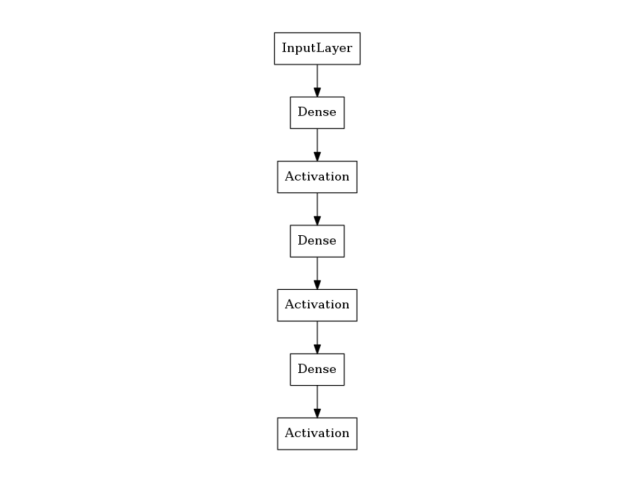

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# (◯, 28, 28)のデータを(◯, 784)に次元削減します。(簡単のためデータ数を減らします)
shapes = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], shapes)[:6000]
X_test = X_test.reshape(X_test.shape[0], shapes)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
# 入力ユニット数は784, 1つ目の全結合層の出力ユニット数は256
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

# 2つ目の全結合層の出力ユニット数は128。活性化関数はrelu。
model.add(Dense(128))
model.add(Activation("relu"))

# 3つ目の全結合層（出力層）の出力ユニット数は10
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# モデル構造の出力
plot_model(model, show_layer_names=True, dpi=150)

# モデル構造の可視化
image = plt.imread("./images/model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.axis('off')
plt.show() 

## モデルの学習
fitメソッドを使用し、 モデルに訓練データを渡すことで学習</br>
fitメソッドでは、学習用データを順にモデルに入力し、 出力と教師データの差が小さくなるように各ニューロンの重みを更新し、モデルの予測精度を向上していく</br>
引数のX_trainは学習用データ、y_trainは教師データ</br>
verbose に １ を指定した場合は学習の進捗度合いを出力し、 0 の場合は出力しない</br>
epochsは、同じデータセットで行う学習の回数を指定する

```python
model.fit(X_train, y_train, verbose=1, epochs=3)
```

Epoch 1/10
188/188 [==============================] - 0s 726us/step - loss: 2.1447 - accuracy: 0.3963
Epoch 2/10
188/188 [==============================] - 0s 713us/step - loss: 1.7186 - accuracy: 0.6773
Epoch 3/10
188/188 [==============================] - 0s 742us/step - loss: 1.3938 - accuracy: 0.7605
Epoch 4/10
188/188 [==============================] - 0s 744us/step - loss: 1.1422 - accuracy: 0.8098
Epoch 5/10
188/188 [==============================] - 0s 737us/step - loss: 0.9545 - accuracy: 0.8360
Epoch 6/10
188/188 [==============================] - 0s 728us/step - loss: 0.8148 - accuracy: 0.8587
Epoch 7/10
188/188 [==============================] - 0s 772us/step - loss: 0.7059 - accuracy: 0.8717
Epoch 8/10
188/188 [==============================] - 0s 741us/step - loss: 0.6224 - accuracy: 0.8853
Epoch 9/10
188/188 [==============================] - 0s 783us/step - loss: 0.5570 - accuracy: 0.8962
Epoch 10/10
188/188 [==============================] - 0s 799us/step - loss: 0.506

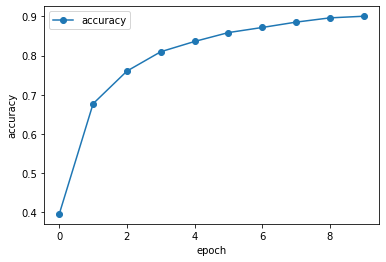

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
# epochsは、同じデータセットで行う学習の回数
history = model.fit(X_train, y_train, verbose=1, epochs=10)

#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="accuracy", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## モデルの評価
学習によるチューニングが完了し、モデルの精度が上がったとしても、その性能が訓練データでしか発揮できない可能性があRU</br>
したがって、学習済みのデータではモデルの性能の正しい評価はできない</br>
学習に使用していない検証データを使用してモデルの評価 を行う</br>
汎化精度の計算には evaluateメソッド を使用

```
score = model.evaluate(X_test, y_test, verbose=1)
```
 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=1)

print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

32/32 [==============================] - 0s 501us/step - loss: 1.9292 - accuracy: 0.5180
evaluate loss: 1.9291671514511108
evaluate acc: 0.5180000066757202


## モデルによる分類
predictメソッド を使って、入力データの予測値を取得
```
predict(self, x, batch_size=None, verbose=0, steps=None)
```
- Parameters
    - x: 入力データ。Numpy配列の形式
    - batch_size: 整数。デフォルトは32
    - verbose: 進行状況メッセージ出力モード。0または1
    - steps: 評価ラウンド終了を宣言するまでの総ステップ数（サンプルのバッチ）。None（デフォルト値）の場合は無視
- Return
    - 予測値を格納したNumpy 配列
      例えば X_test の画像2枚の数字を予測する場合、下記のようになる
      predict は複数枚の画像を想定しているため、1枚のみの予測は次元に注意する必要がある
      もし1枚だけを予測したい場合は、引数を X_test[0].reshape(1,-1) といったように記述する工夫が必要
      MNISTでは predictメソッド の出力は10次元なので、配列の最大値のインデックスを返す
      argmax関数 を使用して一番大きい値を返すニューロンの場所を取得
      ```
        import numpy as np
        # 学習済みのモデルを用意
        model = ...

        # 予測する
        pred = np.argmax(model.predict(X_test[0:2]))
        print("予測値 :" + str(pred))
      ```



Epoch 1/10
188/188 [==============================] - 0s 737us/step - loss: 2.1023 - accuracy: 0.4302
Epoch 2/10
188/188 [==============================] - 0s 744us/step - loss: 1.7088 - accuracy: 0.6890
Epoch 3/10
188/188 [==============================] - 0s 739us/step - loss: 1.3943 - accuracy: 0.7647
Epoch 4/10
188/188 [==============================] - 0s 936us/step - loss: 1.1390 - accuracy: 0.8090
Epoch 5/10
188/188 [==============================] - 0s 742us/step - loss: 0.9447 - accuracy: 0.8407
Epoch 6/10
188/188 [==============================] - 0s 742us/step - loss: 0.8018 - accuracy: 0.8635
Epoch 7/10
188/188 [==============================] - 0s 729us/step - loss: 0.6929 - accuracy: 0.8780
Epoch 8/10
188/188 [==============================] - 0s 738us/step - loss: 0.6088 - accuracy: 0.8908
Epoch 9/10
188/188 [==============================] - 0s 736us/step - loss: 0.5424 - accuracy: 0.8995
Epoch 10/10
188/188 [==============================] - 0s 720us/step - loss: 0.492

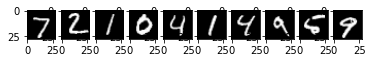

予測値: [7 2 1 0 4 1 4 9 6 9]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, verbose=1, epochs=10)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

# 検証データの最初の10枚を表示
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print("予測値: " + str(pred))

# 深層学習のチューニング
## ハイパーパラメータ
ニューラルネットワークには、人の手で調整が必要となるハイパーパラメータが存在する</br>
ハイパーパラメータは数多く存在し、適切に設定しないと正しく学習が行われません</br>
そこで、新規モデル作成時には最適なハイパーパラメータを設計する必要がある</br>
MNIST分類のコードに少しだけ変更を加え、いくつかのパラメータを明示した</br>
なお、metricsは評価関数
```python
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
# ハイパーパラメータ：活性化関数
model.add(Activation("sigmoid"))
# ハイパーパラメータ：隠れ層の数、隠れ層のユニット数
model.add(Dense(128))
model.add(Activation("sigmoid"))
# ハイパーパラメータ：ドロップアウトする割合（rate）
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

# ハイパーパラメータ：学習率（lr）
sgd = optimizers.SGD(lr=0.01)

# ハイパーパラメータ：最適化関数（optimizer）
# ハイパーパラメータ：誤差関数（loss）
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# ハイパーパラメータ：バッチサイズ（batch_size）
# ハイパーパラメータ：エポック数（epochs）
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))
```

## ネットワーク構造の設定
入力層と出力層の間にある 隠れ層 の数やユニット数は自由に指定することが可能で、数を多くすることによって多彩な関数を表現できるようになる</br>
しかし、隠れ層の数が多い場合は、重みの調整の難易度が上がって学習の進行が遅く なったり、ユニット数が多い場合は、重要度の低い特徴量を抽出して 過学習 (汎化性能が低い状態)を起こしやすくなる</br>
したがって、ただやみくもに数を増やすのではなく、<b>学習に適切な数を隠れ層に設定</b>する</br>
ネットワークの構造の設定に基準はありませんが、例えば中間層のユニット数を入力層より大きくし、その後小さいユニット数の層を追加していくしていく設定方法が挙げられる

- A: ユニット数256の全結合隠れ層1つ、ユニット数128の全結合隠れ層1つ
- B: ユニット数256の全結合隠れ層1つ、ユニット数128の全結合隠れ層3つ
- C: ユニット数256の全結合隠れ層1つ、ユニット数1568の全結合隠れ層1つ


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

def funcA():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcB():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcC():
    model.add(Dense(1568))
    model.add(Activation("sigmoid"))

# A、B、Cのモデル
funcA()
# funcB()
# funcC()
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
188/188 [==============================] - 0s 776us/step - loss: 1.7744 - accuracy: 0.4038
Epoch 2/3
188/188 [==============================] - 0s 795us/step - loss: 1.0605 - accuracy: 0.6683
Epoch 3/3
188/188 [==============================] - 0s 792us/step - loss: 0.8709 - accuracy: 0.7277
evaluate loss: 0.7088652849197388
evaluate acc: 0.8040000200271606


## ドロップアウト
ドロップアウトは、学習データに対する過学習を防ぎ、モデルの精度をあげるための手法の一つ</br>
ドロップアウトではランダムにニューロンを削除（0で上書き）しながら、学習を繰り返す</br>
それによって、ニューラルネットワークは特定のニューロンに依存することなく、より<b>汎用的な特徴を学習</b>するようになる</br>
```python
model.add(Dropout(rate=0.5))
```


Epoch 1/5
188/188 [==============================] - 0s 2ms/step - loss: 1.7076 - accuracy: 0.4303 - val_loss: 1.0933 - val_accuracy: 0.6870
Epoch 2/5
188/188 [==============================] - 0s 910us/step - loss: 1.0474 - accuracy: 0.6728 - val_loss: 0.8446 - val_accuracy: 0.7480
Epoch 3/5
188/188 [==============================] - 0s 915us/step - loss: 0.8386 - accuracy: 0.7375 - val_loss: 0.7193 - val_accuracy: 0.7760
Epoch 4/5
188/188 [==============================] - 0s 954us/step - loss: 0.7688 - accuracy: 0.7698 - val_loss: 0.6512 - val_accuracy: 0.8350
Epoch 5/5
188/188 [==============================] - 0s 901us/step - loss: 0.7261 - accuracy: 0.7733 - val_loss: 0.6050 - val_accuracy: 0.8280


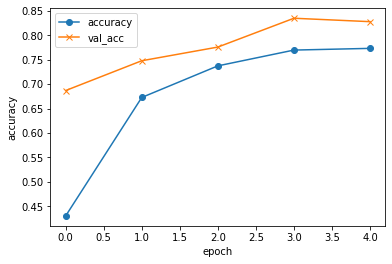

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))

model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="accuracy", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## 活性化関数
活性化関数とは、全結合層などの後に適用する関数で、ニューロンの発火に相当するもの</br>
全結合層では、入力を線形変換して出力しますが、 活性化関数を用いることで非線形性をもたせることができる</br>
活性化関数を使用しないと、下図のように一本の直線で分離できず（線形分離不可能）、データが分類できなくなる</br>
活性化関数によって非線形性をもたせることで、 線形分離不可能なモデルでも、適切に学習が進めば必ず分類できるようになる</br>
note: 活性化関数にもいくつかの種類があるので、適切なものを選ぶことが大切

![](./images/classifier_model.png)

### シグモイド関数
シグモイド関数は活性化関数のひとつで、入力値を0から1の間の数値にして出力</br>
青いグラフが シグモイド関数 で、オレンジ色のグラフがシグモイド関数を微分した 導関数</br>
![](./images/sigmoid.png)

### ReLU
使われることが多い活性化関数として ReLU（ランプ関数）がある</br>
この関数は入力値が0未満であれば0を、0以上であれば入力値を出力値とする</br>
青いグラフが ReLU で、オレンジ色のグラフが ReLUの導関数を表す

![](./images/relu.png)

## 損失関数
学習時に出力データと教師データとの差を評価する関数を 損失関数（誤差関数）という</br>
正解率を指標に評価することも可能だが、それだけでは個々の出力データの正解・不正解といった細かい結果までは分からない</br>
つまり、一つひとつの出力データと教師データの差をみるために 損失関数 が使われる</br>

損失関数にはたくさんの種類がありますが、機械学習によく使われるものとしては 二乗誤差 や クロスエントロピー誤差 などが挙げられる</br>
また、損失関数の微分の計算を効率的にするために誤差逆伝播法という手法が使われる</br>
この手法では、出力データと教師データの差を 最小化 するように各層の 重みを更新 する

### 平均二乗誤差
平均二乗誤差は最小二乗法と並んで、統計学などの分野でよく使用される誤差関数</br>
y_i は予測ラベル 、t_i は正解ラベル</br>
平均二乗誤差は連続値の評価を得意とするため、 主に回帰モデルの誤差関数 として使われる</br>
1/n はデータ数で決まる定数なので、省略して単に誤差の2乗値を合計した誤差関数を使うこともある

![](./images/mean_square_error.png)

### クロスエントロピー誤差
クロスエントロピー誤差は、 分類の評価に特化 しているため、主に 分類モデルの誤差関数 として使われる</br>
サンプルの個数をNN、ii番目のサンプルの正解ラベルをt_it、予測値をy_iyとおくと、2値分類のクロスエントロピー誤差の大きさEは次の式で表せる</br>

![](./images/cross_entropy_error.png)


## 最適化関数
誤差関数を各重みで微分した値をもとに、各重みの更新量を決定し、重みを更新する</br>
その際、 <b>学習率</b>、<b>エポック数</b>、<b>過去の重みの更新量</b>など をどのように重みの更新に反映するかを定めるために使用するのが 最適化関数</br>
それぞれ別の最適化関数を使った場合に、各重みパラメータの値が調整され、損失関数の値が最小値に至るまでの過程を表す</br>
図の通り、最適化関数にはいくつかの種類があり、正しく選択しないと 学習に悪影響を及ぼす可能性があるので注意が必要

![](./images/adjustment_of_weight.gif)

## 学習率
学習率とは、各層の重みを一度にどの程度変更するかを決めるハイパーパラメータ</br>
下図は、最小化を行うモデルと、 学習率 が与える影響を図示したもの</br>
右上の点が初期値</br>

1. 学習率が低すぎて、ほとんど更新が進んでいません。
2. 適切な学習率により、少ない回数で値が収束しています。
3. 収束はしますが、値が大きいため、更新に無駄があります。
4. 学習率が高すぎて、値が発散しています。(上側に更新され、値がどんどん大きくなっています)

つまり、モデルの学習を適切に行うためには、損失関数に対する適切な学習率を設定する必要がある

![](./images/dnn_chap2_50.png)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


def funcA():
    global lr
    lr = 0.01

def funcB():
    global lr
    lr = 0.1

def funcC():
    global lr
    lr = 1.0

# 3つのうち1つを選び、他の2行をコメントアウトして学習率を決める
#---------------------------
# funcA()
funcB()
# funcC()
#---------------------------

sgd = optimizers.SGD(lr=lr)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
188/188 [==============================] - 0s 721us/step - loss: 1.7134 - accuracy: 0.4173
Epoch 2/3
188/188 [==============================] - 0s 751us/step - loss: 1.0476 - accuracy: 0.6663
Epoch 3/3
188/188 [==============================] - 0s 741us/step - loss: 0.8577 - accuracy: 0.7328
evaluate loss: 0.7194048166275024
evaluate acc: 0.7950000166893005


## ミニバッチ学習
モデルに一度に入力するデータの数をバッチサイズと呼が、これも ハイパーパラメータ のひとつ</br>
一度に複数のデータを渡した場合、モデルはデータごとに損失関数の値と損失関数の 勾配 を計算し、それぞれのデータの勾配の平均値をもとに1度だけ重みの更新</br>

このように、 複数のデータ で 重みの更新を行うことで 偏ったデータの影響を減らし 、並列計算を行うことで 計算時間を短縮 することもできる</br>
しかし一方で、大きな重みの更新が発生しにくくなり、 一部のデータに最適化されてしまい、全体のデータへの最適化が行われなくなる状態（局所解）から抜け出せなくなる可能性 もある</br>
それを回避するためには、イレギュラーなデータが多い時には バッチサイズを大きくする、少ないときには バッチサイズを小さくする といったように、バッチサイズを調整

- バッチサイズを 1 に設定する学習法を オンライン学習(確率的勾配降下法)、
- 全データ数 に設定する学習方法をバッチ学習(最急降下法）
- その中間 となる少ない数に設定する学習法を ミニバッチ学習


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# 3つのうち1つを選び、他の2行をコメントアウトしてbatch_sizeを決めてください。
#---------------------------
# funcA()
# funcB()
funcC()
#---------------------------

model.fit(X_train, y_train, batch_size=batch_size, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
94/94 [==============================] - 0s 1ms/step - loss: 1.8913 - accuracy: 0.3703
Epoch 2/3
94/94 [==============================] - 0s 973us/step - loss: 1.1318 - accuracy: 0.6653
Epoch 3/3
94/94 [==============================] - 0s 996us/step - loss: 0.8500 - accuracy: 0.7467
evaluate loss: 0.6932972073554993
evaluate acc: 0.8040000200271606


## 反復学習
一般的にディープラーニングでは反復学習を行い、同じ訓練データで学習を繰り返す</br>
学習の回数を エポック数 といい、これもハイパーパラメータ</br>
エポック数は多く設定すれば、モデルの精度が上がり続けるというものではない</br>
適切なエポック数を設定しなかった場合、途中から精度が伸びなくなり、それだけでなく学習を繰り返すことで損失関数を最小化させようとして過学習を引き起こしてしまう可能性がある

そのため、適切なエポック数を設定し、タイミング良く 学習を打ち切る ことも重要

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 2.1224 - accuracy: 0.2880 - val_loss: 2.0310 - val_accuracy: 0.3570
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.6925 - accuracy: 0.5960 - val_loss: 1.6395 - val_accuracy: 0.4325
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.3588 - accuracy: 0.6970 - val_loss: 1.3666 - val_accuracy: 0.6873
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0810 - accuracy: 0.7830 - val_loss: 1.1413 - val_accuracy: 0.6813
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.8110 - val_loss: 1.0171 - val_accuracy: 0.7138
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7886 - accuracy: 0.8320 - val_loss: 0.9762 - val_accuracy: 0.6990
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.8520 - val_loss: 0.8584 - val_accuracy: 0.7453
Epoch 8/10
32/32 [==

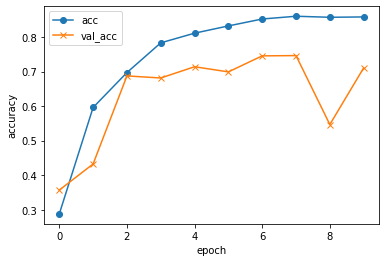

evaluate loss: 0.8567106127738953
evaluate acc: 0.7105000019073486


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:1000]
X_test = X_test.reshape(X_test.shape[0], 784)[:6000]
y_train = to_categorical(y_train)[:1000]
y_test = to_categorical(y_test)[:6000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 今回はDropoutを使いません。
#model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global epochs
    epochs = 5

def funcB():
    global epochs
    epochs = 10

def funcC():
    global epochs
    epochs = 50

# 3つのうち1つを選び、他の2行をコメントアウトしてエポック数を決めてください。
#---------------------------
# funcA()
funcB()
# epochs: 50
# funcC()
#---------------------------

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))